In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import catboost
import lightgbm
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df_train.describe()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,53236.000000,53236.000000,5.323600e+04,53172.000000,53172.000000,53172.000000,51260.000000,53236.000000,53236.000000,53236.000000
mean,0.314407,18850.101172,2.096828e+05,0.250019,0.077240,0.060652,99.062739,10.879198,10875.163423,0.937956
std,0.334858,5217.117568,5.763242e+05,0.696721,0.436435,0.314925,0.746464,5.168850,9318.368252,0.241239
min,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.960000,2.000000,1200.000000,0.000000
25%,0.034000,14974.000000,1.076000e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,0.167000,18625.000000,1.659600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,0.539000,22636.000000,2.509900e+05,0.000000,0.000000,0.000000,99.530000,14.000000,13800.000000,1.000000
max,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [4]:
df_train.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
2,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
3,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
4,1.000,24829,118400,0.0,0.0,0.0,99.05,11,B,Urban,7500,1


In [5]:
df_test.count()

perc_premium_paid_by_cash_credit    26617
age_in_days                         26617
Income                              26617
Count_3.6_months_late               26584
Count_6.12_months_late              26584
Count_more_than_12_months_late      26584
application_underwriting_score      25619
no_of_premiums_paid                 26617
sourcing_channel                    26617
residence_area_type                 26617
premium                             26617
dtype: int64

### Labeling categorical parameters

only sourcing_channel and residence_area_type are categorical data types in this data set.

In [6]:

for col in df_train.columns:
    le = LabelEncoder()
    if df_train[col].dtype == 'object':
        df_train[col] = le.fit_transform(df_train[col]) 
        df_test[col] = le.transform(df_test[col])

df_train.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,1,3300,1
1,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,0,3300,0
2,0.049,15341,250510,0.0,0.0,0.0,99.57,9,0,1,9600,1
3,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,1,9600,1
4,1.000,24829,118400,0.0,0.0,0.0,99.05,11,1,1,7500,1


### Chcking data quality

In [7]:
df_train.isnull().any()

perc_premium_paid_by_cash_credit    False
age_in_days                         False
Income                              False
Count_3.6_months_late                True
Count_6.12_months_late               True
Count_more_than_12_months_late       True
application_underwriting_score       True
no_of_premiums_paid                 False
sourcing_channel                    False
residence_area_type                 False
premium                             False
renewal                             False
dtype: bool

In [8]:
np.where(df_train.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [9]:
df_train.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3.6_months_late                 64
Count_6.12_months_late                64
Count_more_than_12_months_late        64
application_underwriting_score      1976
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [12]:
X = df_train.drop('renewal', axis = 1)
y = df_train['renewal']

In [ ]:
seed = 2021
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)
# preparing validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5)

# fit model on training data
xgb_model = XGBClassifier(random_state=2020, n_estimators=2000, max_depth=8, colsample_bytree=0.85, missing=None,
                          scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], early_stopping_rounds=10, verbose=150 )


[00:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68952	validation_1-logloss:0.68950
[150]	validation_0-logloss:0.44046	validation_1-logloss:0.44118
[300]	validation_0-logloss:0.37712	validation_1-logloss:0.38171
[450]	validation_0-logloss:0.35073	validation_1-logloss:0.36083
[600]	validation_0-logloss:0.33622	validation_1-logloss:0.35102
[750]	validation_0-logloss:0.32579	validation_1-logloss:0.34421
[900]	validation_0-logloss:0.31624	validation_1-logloss:0.33860
[1050]	validation_0-logloss:0.30846	validation_1-logloss:0.33416
[1200]	validation_0-logloss:0.30135	validation_1-logloss:0.32991
[1350]	validation_0-logloss:0.29485	validation_1-logloss:0.32605
[1500]	validation_0-logloss:0.28784	validation_1-

### trained model accuracy

pos_label : str or int, 1 by default
    The class to report if ``average='binary'`` and the data is binary.
    If the data are multiclass or multilabel, this will be ignored;
    setting ``labels=[pos_label]`` and ``average != 'binary'`` will report
    scores for that label only.

In [12]:
predictions_xgb = xgb_model.predict(X_test)
predictions_xgb 

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [13]:
accuracy_score(y_test, predictions_xgb)

0.8762680025046963

In [14]:
f1_score(y_test, predictions_xgb, pos_label=1)

0.9318244548716533

In [15]:
f1_score(y_test, predictions_xgb, pos_label=0)

0.33152909336941816

### Train xgboost model with cross validation

More detail available at [link](https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/).

In [17]:
kfold = KFold(n_splits=4, random_state=7) # n_split=10 is recommended
results = cross_val_score(xgb_model, X, y, cv=kfold) # scoring='accuracy'

[14:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [18]:
# using average of all folds' accuracy as out-of-sample accuracy
results.mean()

0.8761928018634006

In [19]:
xgb_model = XGBClassifier(random_state=2020, n_estimators=2000, max_depth=8, colsample_bytree=0.85, missing=None,
                          scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)


# X: feature matrix
# y: target value
ff1 = []
ff2 = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], verbose=False, early_stopping_rounds=10)
    pred = xgb_model.predict(X_test)
    ff1.append(f1_score(y_test, pred, pos_label=0))
    ff2.append(f1_score(y_test, pred, pos_label=1))
# ff1_mean = ff1.mean()
# ff2_mean = ff2.mean()

[14:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [20]:
ff1

[0.3697560975609756,
 0.39245283018867927,
 0.34096444227959083,
 0.36168132942326486,
 0.3401496259351621]

### Feature importance of xgboost model

In [21]:
xgb_model.feature_importances_

array([0.11077998, 0.02295998, 0.0210686 , 0.17539798, 0.41342306,
       0.15846011, 0.0231732 , 0.02247528, 0.0177384 , 0.01647643,
       0.01804698], dtype=float32)

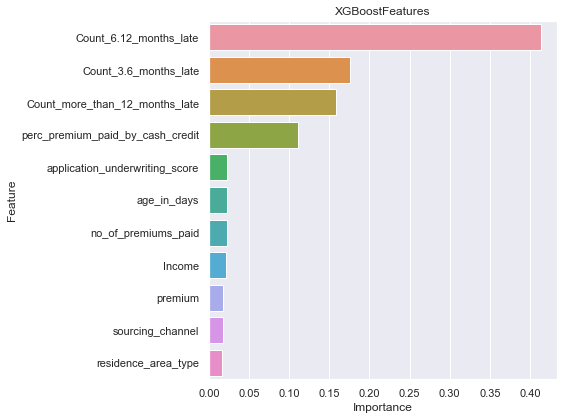

In [22]:
imp = pd.DataFrame({'Importance':xgb_model.feature_importances_,'Feature':X.columns})
plt.figure(figsize=(8, 6))
sns.set(font_scale = 1)
sns.barplot(x="Importance", y="Feature", data=imp.sort_values(by="Importance", ascending=False))
plt.title('XGBoostFeatures')
plt.tight_layout()
plt.show()

In [23]:
imp

,Importance,Feature
0,0.110780,perc_premium_paid_by_cash_credit
1,0.022960,age_in_days
2,0.021069,Income
3,0.175398,Count_3.6_months_late
4,0.413423,Count_6.12_months_late
5,0.158460,Count_more_than_12_months_late
6,0.023173,application_underwriting_score
7,0.022475,no_of_premiums_paid
8,0.017738,sourcing_channel
9,0.016476,residence_area_type


In [24]:
xgb_model = XGBClassifier(random_state=2020, n_estimators=2000, max_depth=8, colsample_bytree=0.85, missing=None,
                          scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)


ff1 = []
ff2 = []
kf = KFold(n_splits=5)
importance = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], verbose=False, early_stopping_rounds=10)
    
    imp = pd.DataFrame({'Importance':xgb_model.feature_importances_,'Feature':X.columns})
    importance.append(imp)    


[15:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [25]:
importance

[    Importance                           Feature
 0     0.116234  perc_premium_paid_by_cash_credit
 1     0.023233                       age_in_days
 2     0.021367                            Income
 3     0.197811             Count_3.6_months_late
 4     0.371811            Count_6.12_months_late
 5     0.166147    Count_more_than_12_months_late
 6     0.023634    application_underwriting_score
 7     0.024310               no_of_premiums_paid
 8     0.018808                  sourcing_channel
 9     0.017828               residence_area_type
 10    0.018817                           premium,
     Importance                           Feature
 0     0.116575  perc_premium_paid_by_cash_credit
 1     0.023246                       age_in_days
 2     0.020691                            Income
 3     0.171118             Count_3.6_months_late
 4     0.416508            Count_6.12_months_late
 5     0.147602    Count_more_than_12_months_late
 6     0.023368    application_underwriting_score

In [26]:
tmp_df = pd.merge(importance[0], importance[1], left_on='Feature', 
                  right_on='Feature')[['Feature', 'Importance_x', 'Importance_y']]
for i in range(2, len(importance)):
    tmp_df = pd.merge(tmp_df, importance[i], left_on='Feature', 
                      right_on='Feature')

tmp_df

,Feature,Importance_x,Importance_y,Importance_x,Importance_y,Importance
0,perc_premium_paid_by_cash_credit,0.116234,0.116575,0.109573,0.108813,0.110780
1,age_in_days,0.023233,0.023246,0.022711,0.021833,0.022960
2,Income,0.021367,0.020691,0.020086,0.020015,0.021069
3,Count_3.6_months_late,0.197811,0.171118,0.182669,0.172925,0.175398
4,Count_6.12_months_late,0.371811,0.416508,0.425327,0.438619,0.413423
5,Count_more_than_12_months_late,0.166147,0.147602,0.139041,0.134624,0.158460
6,application_underwriting_score,0.023634,0.023368,0.023021,0.023398,0.023173
7,no_of_premiums_paid,0.024310,0.023655,0.022708,0.023065,0.022475
8,sourcing_channel,0.018808,0.020130,0.018049,0.020059,0.017738
9,residence_area_type,0.017828,0.018452,0.018660,0.018853,0.016476


In [27]:
tmp_df['mean'] = tmp_df.mean(axis=1)
tmp_df
# tmp_df.groupby('Feature').mean()

,Feature,Importance_x,Importance_y,Importance_x,Importance_y,Importance,mean
0,perc_premium_paid_by_cash_credit,0.116234,0.116575,0.109573,0.108813,0.110780,0.112395
1,age_in_days,0.023233,0.023246,0.022711,0.021833,0.022960,0.022797
2,Income,0.021367,0.020691,0.020086,0.020015,0.021069,0.020646
3,Count_3.6_months_late,0.197811,0.171118,0.182669,0.172925,0.175398,0.179984
4,Count_6.12_months_late,0.371811,0.416508,0.425327,0.438619,0.413423,0.413138
5,Count_more_than_12_months_late,0.166147,0.147602,0.139041,0.134624,0.158460,0.149175
6,application_underwriting_score,0.023634,0.023368,0.023021,0.023398,0.023173,0.023319
7,no_of_premiums_paid,0.024310,0.023655,0.022708,0.023065,0.022475,0.023243
8,sourcing_channel,0.018808,0.020130,0.018049,0.020059,0.017738,0.018957
9,residence_area_type,0.017828,0.018452,0.018660,0.018853,0.016476,0.018054


In [28]:
# dummy = {'feature_mean':feature_mean}
# dummy_df = pd.DataFrame(dummy)
# pd.concat([tmp_df, dummy_df])

### Importance of features by taking average of kfold cross validation

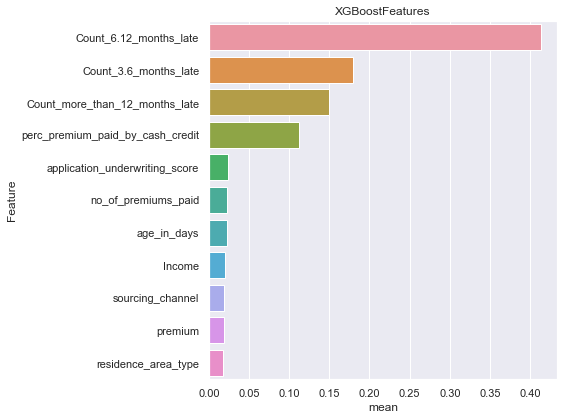

In [29]:
plt.figure(figsize=(8, 6))
sns.set(font_scale = 1)
sns.barplot(x="mean", y="Feature", data=tmp_df.sort_values(by="mean", ascending=False))
plt.title('XGBoostFeatures')
plt.tight_layout()
plt.show()

### Predicting target values of test data frame 

In [30]:
predict_target = xgb_model.predict(df_test)
df_target_xgb = pd.DataFrame(predict_target)
df_target_xgb.to_csv('xgb_df.csv', index=False)

In [31]:
df_target_xgb.count()

0    26617
dtype: int64

In [32]:
df_target_xgb

,0
0,1
1,1
2,1
3,1
4,1
...,...
26612,0
26613,0
26614,1
26615,1


In [33]:
df_test.count()

perc_premium_paid_by_cash_credit    26617
age_in_days                         26617
Income                              26617
Count_3.6_months_late               26584
Count_6.12_months_late              26584
Count_more_than_12_months_late      26584
application_underwriting_score      25619
no_of_premiums_paid                 26617
sourcing_channel                    26617
residence_area_type                 26617
premium                             26617
dtype: int64

### Lightgbm

Calculating the same thing by lightgbm

In [ ]:
lgb = lightgbm.LGBMClassifier(random_state=2020, n_estimators=2000, num_leaves=31, learning_rate=0.011, colsample_bytree=0.85, max_depth=5,
                              verbose=-1, class_weight={0:0.2, 1:0.8}, importance='gain')
lgb.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False, early_stopping_rounds=50)
pred = lgb.predict(X_test, num_iteration=lgb.best_iteration_)
print(f1_score(y_test, pred, pos_label=0))

In [35]:
lgb.best_iteration_

2000

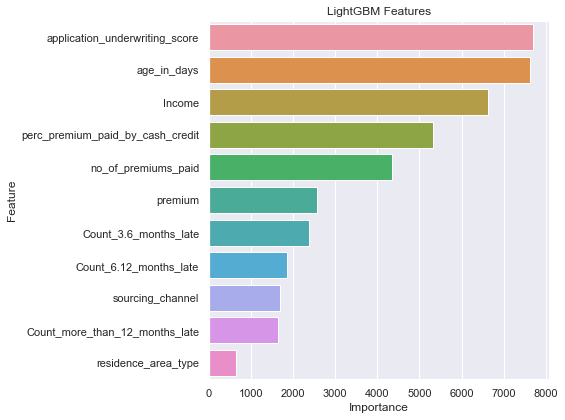

In [36]:
imp = pd.DataFrame({'Importance':lgb.feature_importances_,'Feature':X.columns})
plt.figure(figsize=(8, 6))
sns.set(font_scale = 1)
sns.barplot(x="Importance", y="Feature", data=imp.sort_values(by="Importance", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

### Using kfold validation and lightgbm

In [ ]:
lgb = lightgbm.LGBMClassifier(random_state=2020, n_estimators=2000, num_leaves=31, learning_rate=0.011, 
                              colsample_bytree=0.85, max_depth=5,
                              verbose=-1, class_weight={0:0.2, 1:0.8}, importance='gain')


ff1_lgb = []
ff2_lgb = []
kf = KFold(n_splits=5)
importance_lgb = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgb.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], verbose=False, early_stopping_rounds=10)
    
    imp = pd.DataFrame({'Importance':lgb.feature_importances_,'Feature':X.columns})
    importance_lgb.append(imp)  
    
    pred = lgb.predict(X_test)
    ff1.append(f1_score(y_test, pred, pos_label=0))
    ff2.append(f1_score(y_test, pred, pos_label=1))

In [38]:
importance_lgb[0]

,Importance,Feature
0,1945,perc_premium_paid_by_cash_credit
1,2464,age_in_days
2,2147,Income
3,1057,Count_3.6_months_late
4,1022,Count_6.12_months_late
5,861,Count_more_than_12_months_late
6,2543,application_underwriting_score
7,1723,no_of_premiums_paid
8,543,sourcing_channel
9,217,residence_area_type


In [39]:
tmp_lgb_df = pd.merge(importance_lgb[0], importance_lgb[1], left_on='Feature', 
                  right_on='Feature')[['Feature', 'Importance_x', 'Importance_y']]
for i in range(2, len(importance_lgb)):
    tmp_lgb_df = pd.merge(tmp_lgb_df, importance_lgb[i], left_on='Feature', 
                      right_on='Feature')

tmp_lgb_df

,Feature,Importance_x,Importance_y,Importance_x,Importance_y,Importance
0,perc_premium_paid_by_cash_credit,1945,2302,1219,1449,1184
1,age_in_days,2464,3256,1669,1927,1649
2,Income,2147,2515,1400,1474,1277
3,Count_3.6_months_late,1057,1337,751,885,818
4,Count_6.12_months_late,1022,1054,717,752,617
5,Count_more_than_12_months_late,861,876,659,716,655
6,application_underwriting_score,2543,3081,1844,1988,1645
7,no_of_premiums_paid,1723,2045,1095,1278,1076
8,sourcing_channel,543,661,272,359,321
9,residence_area_type,217,277,115,124,62


In [40]:
tmp_lgb_df['mean'] = tmp_lgb_df.mean(axis=1)
tmp_lgb_df

,Feature,Importance_x,Importance_y,Importance_x,Importance_y,Importance,mean
0,perc_premium_paid_by_cash_credit,1945,2302,1219,1449,1184,1619.8
1,age_in_days,2464,3256,1669,1927,1649,2193.0
2,Income,2147,2515,1400,1474,1277,1762.6
3,Count_3.6_months_late,1057,1337,751,885,818,969.6
4,Count_6.12_months_late,1022,1054,717,752,617,832.4
5,Count_more_than_12_months_late,861,876,659,716,655,753.4
6,application_underwriting_score,2543,3081,1844,1988,1645,2220.2
7,no_of_premiums_paid,1723,2045,1095,1278,1076,1443.4
8,sourcing_channel,543,661,272,359,321,431.2
9,residence_area_type,217,277,115,124,62,159.0


### Using kfold cross-validation of lightgbm for feature importance

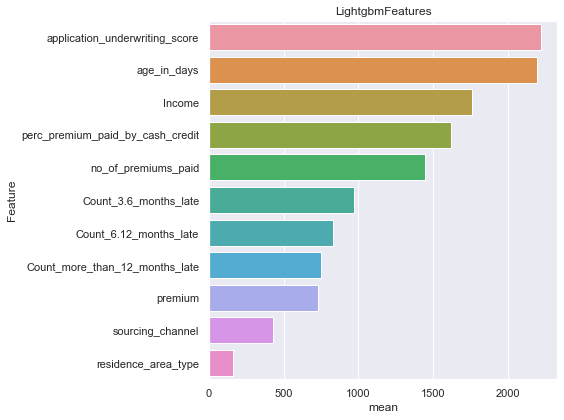

In [41]:
plt.figure(figsize=(8, 6))
sns.set(font_scale = 1)
sns.barplot(x="mean", y="Feature", data=tmp_lgb_df.sort_values(by="mean", ascending=False))
plt.title('LightgbmFeatures')
plt.tight_layout()
plt.show()

### Predicting target values of test dataframe by lightgbm

In [42]:
predict_lgb_target = lgb.predict(df_test)
df_target_lgb = pd.DataFrame(predict_lgb_target)
df_target_lgb.to_csv('lgb_df.csv', header=False, index=False)

In [43]:
df_target_lgb

,0
0,1
1,1
2,1
3,1
4,1
...,...
26612,1
26613,1
26614,1
26615,1


### Preprocessing data before applying xgboost and lightgbm

From previous section is it obvious that only few features have significant impact on target value. In this section features are filtered based on their importance and are normalized before being applied to each model.

Two normalization techniques are used:

+ min max scaling
+ Z score

The results are then compared.

#### Imprtant features for xgboost model
+ Count_6.12_months_late
+ Count_3.6_months_late
+ Count_more_than_12_months_late
+ perc_premium_paid_by_cash_credit

In [44]:
columns_to_keep = ['Count_6.12_months_late', 'Count_3.6_months_late', 
                   'Count_more_than_12_months_late', 'perc_premium_paid_by_cash_credit']
X_xgb = X[columns_to_keep]
X_xgb.head()

,Count_6.12_months_late,Count_3.6_months_late,Count_more_than_12_months_late,perc_premium_paid_by_cash_credit
0,0.0,0.0,0.0,0.429
1,3.0,2.0,1.0,0.917
2,0.0,0.0,0.0,0.049
3,0.0,0.0,0.0,0.052
4,0.0,0.0,0.0,1.000


In [45]:
minmaxscaler = MinMaxScaler()
X_xgb_norm = minmaxscaler.fit_transform(X_xgb)
X_xgb = pd.DataFrame(X_xgb_norm, columns=X_xgb.columns)

In [46]:
X_xgb.head()

,Count_6.12_months_late,Count_3.6_months_late,Count_more_than_12_months_late,perc_premium_paid_by_cash_credit
0,0.000000,0.000000,0.000000,0.429
1,0.176471,0.153846,0.090909,0.917
2,0.000000,0.000000,0.000000,0.049
3,0.000000,0.000000,0.000000,0.052
4,0.000000,0.000000,0.000000,1.000


In [47]:
xgb_model_norm = XGBClassifier(random_state=2020, n_estimators=2000, max_depth=4, colsample_bytree=0.85, missing=None,
                          scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)

ff1 = []
ff2 = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_xgb):
    X_train, X_test = X_xgb.iloc[train_index], X_xgb.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb_model_norm.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], 
                       verbose=False, early_stopping_rounds=10)
    pred = xgb_model_norm.predict(X_test)
    ff1.append(f1_score(y_test, pred, pos_label=0))
    ff2.append(f1_score(y_test, pred, pos_label=1))

[15:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [48]:
 ff1

[0.3574389682174114,
 0.3741648106904231,
 0.3408360128617363,
 0.3603431839847474,
 0.32894139027714675]

In [49]:
 ff2

[0.9270588235294118,
 0.9262428473935639,
 0.9249359209080922,
 0.9300896020004168,
 0.9226418058974493]

**Normalizing test dataset before applying it to model for prediction**

In [50]:
df_test_xgb_norm = df_test[columns_to_keep]
df_test_xgb_norm.head()

,Count_6.12_months_late,Count_3.6_months_late,Count_more_than_12_months_late,perc_premium_paid_by_cash_credit
0,0.0,0.0,0.0,0.052
1,0.0,0.0,0.0,0.628
2,0.0,0.0,0.0,0.458
3,0.0,0.0,0.0,1.000
4,0.0,0.0,0.0,0.190


In [51]:
minmaxscaler = MinMaxScaler()
tmp1 = minmaxscaler.fit_transform(df_test_xgb_norm)
X_xgb_test = pd.DataFrame(tmp1, columns=df_test_xgb_norm.columns)
X_xgb_test.head()

,Count_6.12_months_late,Count_3.6_months_late,Count_more_than_12_months_late,perc_premium_paid_by_cash_credit
0,0.0,0.0,0.0,0.052
1,0.0,0.0,0.0,0.628
2,0.0,0.0,0.0,0.458
3,0.0,0.0,0.0,1.000
4,0.0,0.0,0.0,0.190


In [52]:
predict_xgb_norm_target = xgb_model_norm.predict(X_xgb_test)
df_target_xgb_norm = pd.DataFrame(predict_xgb_norm_target)
df_target_xgb_norm.to_csv('xgb_norm_df.csv', header=False, index=False)

### Normalizing by using Z-Score

In [53]:
columns_to_keep = ['Count_6.12_months_late', 'Count_3.6_months_late', 
                   'Count_more_than_12_months_late', 'perc_premium_paid_by_cash_credit']
X_xgb_z = X[columns_to_keep]

In [54]:
standardscaler = StandardScaler()
X_xgb_norm = standardscaler.fit_transform(X_xgb_z) # output is a numpy array
X_xgb_z = pd.DataFrame(X_xgb_norm, columns=X_xgb_z.columns)
X_xgb_z.head()

,Count_6.12_months_late,Count_3.6_months_late,Count_more_than_12_months_late,perc_premium_paid_by_cash_credit
0,-0.176981,-0.358854,-0.192594,0.342217
1,6.696959,2.511764,2.982790,1.799563
2,-0.176981,-0.358854,-0.192594,-0.792601
3,-0.176981,-0.358854,-0.192594,-0.783642
4,-0.176981,-0.358854,-0.192594,2.047431


In [55]:
xgb_model_znorm = XGBClassifier(random_state=2020, n_estimators=2000, max_depth=4, colsample_bytree=0.80, missing=None,
                          scale_pos_weight=0.1, learning_rate=0.008, reg_alpha=2.01, reg_lambda=0.05, verbosity=1)

ff1_znorm = []
ff2_znorm = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_xgb_z):
    X_train, X_test = X_xgb_z.iloc[train_index], X_xgb_z.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb_model_znorm.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], 
                       verbose=False, early_stopping_rounds=10)
    pred = xgb_model_znorm.predict(X_test)
    ff1_znorm.append(f1_score(y_test, pred, pos_label=0))
    ff2_znorm.append(f1_score(y_test, pred, pos_label=1))

[15:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [56]:
ff1_znorm

[0.3574389682174114,
 0.3741648106904231,
 0.3408360128617363,
 0.3603431839847474,
 0.32894139027714675]

In [57]:
ff2_znorm

[0.9270588235294118,
 0.9262428473935639,
 0.9249359209080922,
 0.9300896020004168,
 0.9226418058974493]

**Normalizing test dataset before applying it to model for prediction**
#### Using z-score normalization

In [58]:
df_test_xgb_znorm = df_test[columns_to_keep]
standardscaler = StandardScaler()
tmp1 = standardscaler.fit_transform(df_test_xgb_znorm)
X_xgb_z_test = pd.DataFrame(tmp1, columns=df_test_xgb_znorm.columns)
X_xgb_z_test.head()

,Count_6.12_months_late,Count_3.6_months_late,Count_more_than_12_months_late,perc_premium_paid_by_cash_credit
0,-0.183411,-0.361286,-0.191812,-0.782176
1,-0.183411,-0.361286,-0.191812,0.937090
2,-0.183411,-0.361286,-0.191812,0.429668
3,-0.183411,-0.361286,-0.191812,2.047450
4,-0.183411,-0.361286,-0.191812,-0.370268


In [59]:
predict_xgb_znorm_target = xgb_model_norm.predict(X_xgb_z_test)
df_target_xgb_znorm = pd.DataFrame(predict_xgb_norm_target)
df_target_xgb_znorm.to_csv('xgb_znorm_df.csv', header=False, index=False)

## Lightgbm
### Applying minmax and z-score normalization on important fetures and applying lightgbm

#### Normalizing feature matrix by minmax

In [70]:
# important features in lightgbm based on kfold cross validation
columns_to_keep = ['application_underwriting_score', 'age_in_days', 'Income', 'perc_premium_paid_by_cash_credit', 
                   'no_of_premiums_paid', 'Count_3.6_months_late', 'Count_6.12_months_late',  
                   'Count_more_than_12_months_late',  'premium', 'sourcing_channel']
X_lgb_minmax= X[columns_to_keep]


minmaxscaler = MinMaxScaler()
X_lgb_norm = minmaxscaler.fit_transform(X_lgb_minmax) # output is a numpy array
X_lgb_minmax = pd.DataFrame(X_lgb_norm, columns=X_lgb_minmax.columns)


lgb_norm = lightgbm.LGBMClassifier(random_state=2020, n_estimators=2000, num_leaves=31, learning_rate=0.011, 
                              colsample_bytree=0.85, max_depth=5,
                              verbose=1, class_weight={0:0.2, 1:0.8}, importance='gain')


ff1_lgb_norm = []
ff2_lgb_norm = []
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X_lgb_minmax):
    X_train, X_test = X_lgb_minmax.iloc[train_index], X_lgb_minmax.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgb_norm.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], verbose=False, early_stopping_rounds=10)
    
    pred = lgb_norm.predict(X_test)
    ff1_lgb_norm.append(f1_score(y_test, pred, pos_label=0))
    ff2_lgb_norm.append(f1_score(y_test, pred, pos_label=1))

[LightGBM] [Warning] Unknown parameter: importance
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: importance
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 39941, number of negative: 2647
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1096
[LightGBM] [Info] Number of data points in the train set: 42588, number of used features: 10
[LightGBM] [Warning] Unknown parameter: importance
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:Boost

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [71]:
ff1_lgb_norm

[0.03582089552238806,
 0.05874499332443257,
 0.048265460030165915,
 0.030075187969924814,
 0.030674846625766868]

In [72]:
ff2_lgb_norm

[0.9686803064093863,
 0.9656850815283524,
 0.9694149580728031,
 0.9687333365650298,
 0.9693828117430481]

### Applying lgb fit with z-score normalized features to test dataset

In [63]:
df_test_lgb_norm = df_test[columns_to_keep]
minmaxscaler = MinMaxScaler()
tmp1 = minmaxscaler.fit_transform(df_test_lgb_norm)
X_lgb_norm_test = pd.DataFrame(tmp1, columns=df_test_lgb_norm.columns)
X_lgb_norm_test.head()

,Count_6.12_months_late,Count_3.6_months_late,Count_more_than_12_months_late,perc_premium_paid_by_cash_credit
0,0.0,0.0,0.0,0.052
1,0.0,0.0,0.0,0.628
2,0.0,0.0,0.0,0.458
3,0.0,0.0,0.0,1.000
4,0.0,0.0,0.0,0.190


In [64]:
predict_lgb_norm_target = lgb_norm.predict(X_lgb_norm_test)
df_target_lgb_norm = pd.DataFrame(predict_lgb_norm_target)
df_target_lgb_norm.to_csv('lgb_minmax_df.csv', header=False, index=False)

### Normalizing feature matrix by z-score

In [73]:
# important features in lightgbm based on kfold cross validation
columns_to_keep = ['application_underwriting_score', 'age_in_days', 'Income', 'perc_premium_paid_by_cash_credit', 
                   'no_of_premiums_paid', 'Count_3.6_months_late', 'Count_6.12_months_late', 
                   'Count_more_than_12_months_late',  'premium', 'sourcing_channel']
X_lgb_z= X[columns_to_keep]

X_lgb_norm = standardscaler.fit_transform(X_lgb_z) # output is a numpy array
X_lgb_z = pd.DataFrame(X_lgb_norm, columns=X_lgb_z.columns)
X_lgb_z.head()

lgb_norm_z = lightgbm.LGBMClassifier(random_state=2020, n_estimators=2000, num_leaves=31, learning_rate=0.011, 
                              colsample_bytree=0.85, max_depth=5,
                              verbose=1, class_weight={0:0.2, 1:0.8}, importance='gain')


ff1_lgb_z = []
ff2_lgb_z = []
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X_lgb_z):
    X_train, X_test = X_lgb_z.iloc[train_index], X_lgb_z.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgb_norm_z.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], verbose=False, early_stopping_rounds=10)
    
    pred = lgb_norm_z.predict(X_test)
    ff1_lgb_z.append(f1_score(y_test, pred, pos_label=0))
    ff2_lgb_z.append(f1_score(y_test, pred, pos_label=1))

[LightGBM] [Warning] Unknown parameter: importance
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: importance
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 39941, number of negative: 2647
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 42588, number of used features: 10
[LightGBM] [Warning] Unknown parameter: importance
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:Boost

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Unknown parameter: importance
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: importance
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 40008, number of negative: 2581
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1062
[LightGBM] [Info] Number of data points in the train set: 42589, number of used features: 10
[LightGBM] [Warning] Unknown parameter: importance
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:Boost

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [74]:
ff1_lgb_z 

[0.04154302670623145,
 0.05622489959839358,
 0.051204819277108425,
 0.04185351270553064,
 0.03658536585365853]

In [75]:
ff2_lgb_z 

[0.9686742314033556,
 0.9656884216673965,
 0.9694619486185168,
 0.9689212121212122,
 0.9693768776044189]

### Applying lgb fit with z-score normalized features to test dataset

In [76]:
df_test_lgb_znorm = df_test[columns_to_keep]
standardscaler = StandardScaler()
tmp1 = standardscaler.fit_transform(df_test_lgb_znorm)
X_lgb_z_test = pd.DataFrame(tmp1, columns=df_test_lgb_znorm.columns)
X_lgb_z_test.head()

,application_underwriting_score,age_in_days,Income,perc_premium_paid_by_cash_credit,no_of_premiums_paid,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,premium,sourcing_channel
0,0.418070,-0.744796,0.163267,-0.782176,0.225490,-0.361286,-0.183411,-0.191812,1.168467,2.049164
1,-3.396333,1.786852,-0.610840,0.937090,0.032224,-0.361286,-0.183411,-0.191812,-0.556508,-0.788985
2,0.597086,1.434956,-0.532582,0.429668,-0.934104,-0.361286,-0.183411,-0.191812,-1.026956,0.157065
3,-0.683563,-1.377516,-0.513399,2.047450,-0.740839,-0.361286,-0.183411,-0.191812,-0.368329,0.157065
4,-0.821267,1.293774,-0.207607,-0.370268,1.771616,-0.361286,-0.183411,-0.191812,0.070755,0.157065


In [77]:
predict_lgb_znorm_target = lgb_norm_z.predict(X_lgb_z_test)
df_target_lgb_znorm = pd.DataFrame(predict_lgb_znorm_target)
df_target_lgb_znorm.to_csv('lgb_znorm_df.csv', header=False, index=False)

# Conclusion


1. Lightgbm is much faster than XGBoost to train.
2. XGBoost is more accurate than Lightgbm.
3. Limiting the number of features in XGBoost deteriorates model accuracy.
4. In XGBoost there are less features being important in target value prediction in comparison to Lightgbm.
5. XGBoost prediction was insensitive to minmax and z-score normalization.
6. Limiting number of features and normalizing them with minmax improves Lightgbm model accuracy.
7. Z-score feature normalization dramatically deteriorates Lightgbm model accuracy. 
8. Limiting number of features to only significant ones, and normalizing the data by using MinMaxScaler made better result in comparison to lightgbm, but slightly deteriorates accuracy in comparison to XGBoost without droping insignificant features.

9. Number of imporant features is higher in Lightgbm in comparison to XGBoost. 
10. Calculating the imprtance of each feature in kfold changes the importance of features. For instance premium in train_test_split fit of Lightgbm was the sixth important feature, while after checking it in all kfold runs, it was the 9th important feature.
11. Lightgbm is much faster to train in comparison to XGBoost.